In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "campania"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,15,Campania,2,0,2,1,3,3,3,...,0.0,0.0,0.0,1.0,0.00,66.67,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,15,Campania,2,0,2,2,4,1,1,...,0.0,203.0,0.0,1.0,0.00,50.00,0.49,0.00,0.00,33.33
4,2020-02-29T17:00:00,15,Campania,3,0,3,10,13,9,9,...,0.0,160.0,0.0,8.0,0.00,23.08,5.62,0.00,0.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2021-01-30T17:00:00,15,Campania,1435,92,1527,60129,61656,14,1366,...,22.0,17345.0,9969.0,7.0,6.02,2.48,7.88,13.70,-3.16,0.02
341,2021-01-31T17:00:00,15,Campania,1417,99,1516,60906,62422,766,1401,...,10.0,17094.0,12252.0,777.0,6.53,2.43,8.20,11.43,7.61,1.24
342,2021-02-01T17:00:00,15,Campania,1437,97,1534,60799,62333,-89,994,...,8.0,8417.0,3456.0,-107.0,6.32,2.46,11.81,28.76,-2.02,-0.14
343,2021-02-02T17:00:00,15,Campania,1480,103,1583,60276,61859,-474,919,...,38.0,11073.0,7452.0,-523.0,6.51,2.56,8.30,12.33,6.19,-0.76


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 3, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1539
Nuovi tamponi: 19429.0
Percentuale nuovi positivi/nuovi tamponi: 7.9 %
Nuovi guariti: 1264.0
Nuovi deceduti: 17.0
Variazione positivi ricoverati con sintomi: -5.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: 266.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 3, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-05T17:00:00,15,Campania,1558,165,1723,99638,101361,-495,1521,...,55.0,18636.0,12036.0,-53.0,9.58,1.70,8.16,12.64,-0.60,-0.49
1,2020-12-06T17:00:00,15,Campania,1916,155,2071,99172,101243,-118,1552,...,32.0,19313.0,9204.0,-466.0,7.48,2.05,8.04,16.86,-6.06,-0.12
2,2020-12-07T17:00:00,15,Campania,1840,137,1977,98318,100295,-948,1060,...,39.0,12330.0,9861.0,-854.0,6.93,1.97,8.60,10.75,-11.61,-0.94
3,2020-12-08T17:00:00,15,Campania,1898,140,2038,96727,98765,-1530,1080,...,35.0,12360.0,7643.0,-1591.0,6.87,2.06,8.74,14.13,2.19,-1.53
4,2020-12-09T17:00:00,15,Campania,1852,138,1990,95223,97213,-1552,1361,...,44.0,15872.0,10036.0,-1504.0,6.93,2.05,8.57,13.56,-1.43,-1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-30T17:00:00,15,Campania,1435,92,1527,60129,61656,14,1366,...,22.0,17345.0,9969.0,7.0,6.02,2.48,7.88,13.70,-3.16,0.02
57,2021-01-31T17:00:00,15,Campania,1417,99,1516,60906,62422,766,1401,...,10.0,17094.0,12252.0,777.0,6.53,2.43,8.20,11.43,7.61,1.24
58,2021-02-01T17:00:00,15,Campania,1437,97,1534,60799,62333,-89,994,...,8.0,8417.0,3456.0,-107.0,6.32,2.46,11.81,28.76,-2.02,-0.14
59,2021-02-02T17:00:00,15,Campania,1480,103,1583,60276,61859,-474,919,...,38.0,11073.0,7452.0,-523.0,6.51,2.56,8.30,12.33,6.19,-0.76


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

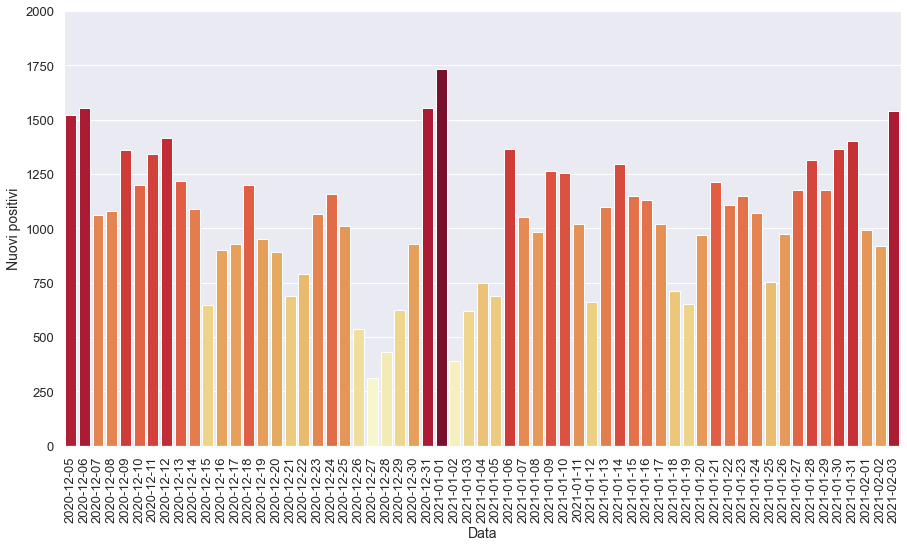

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

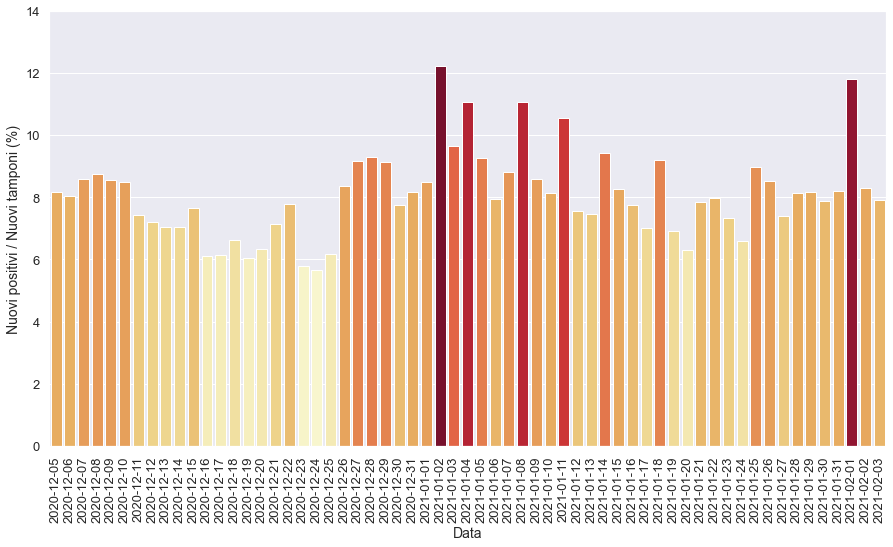

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

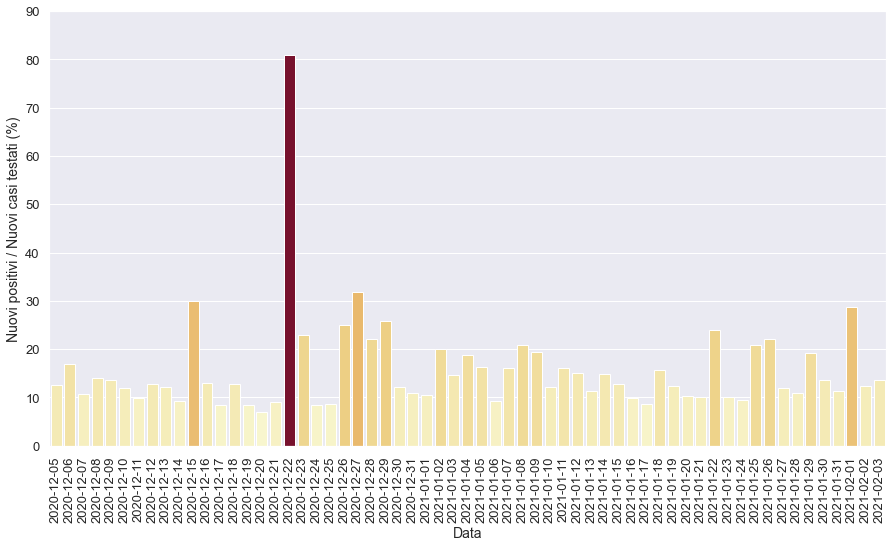

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

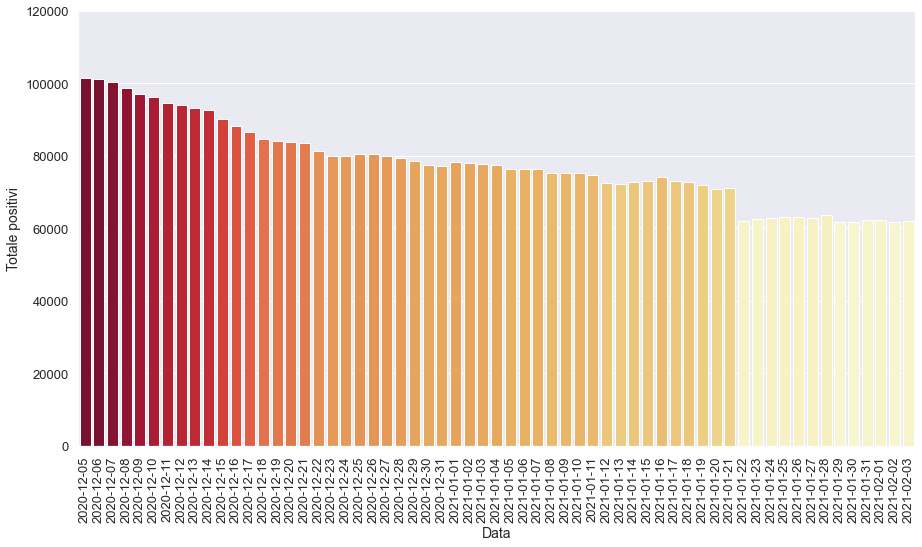

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

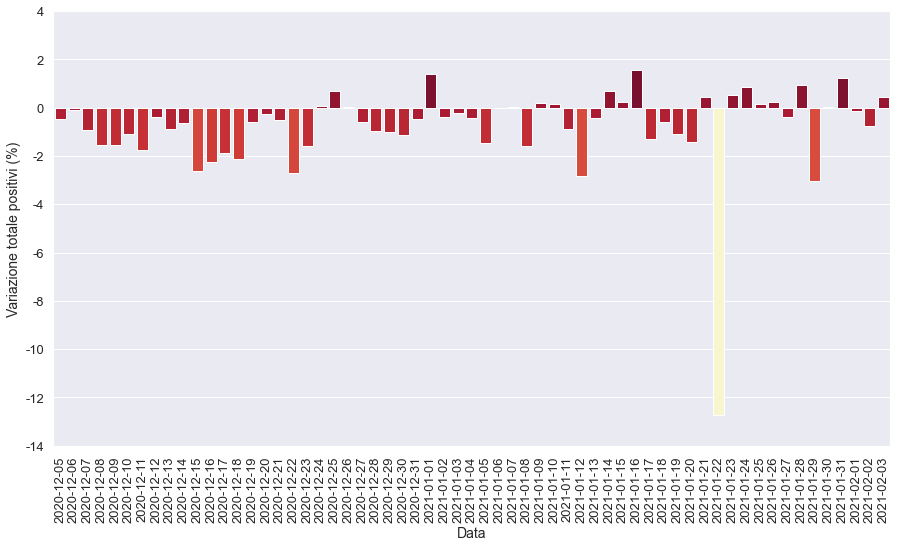

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

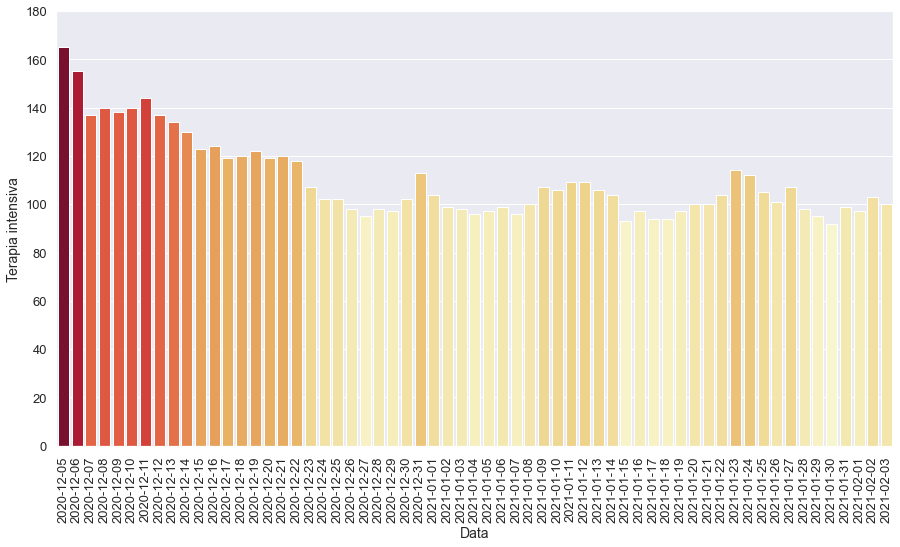

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

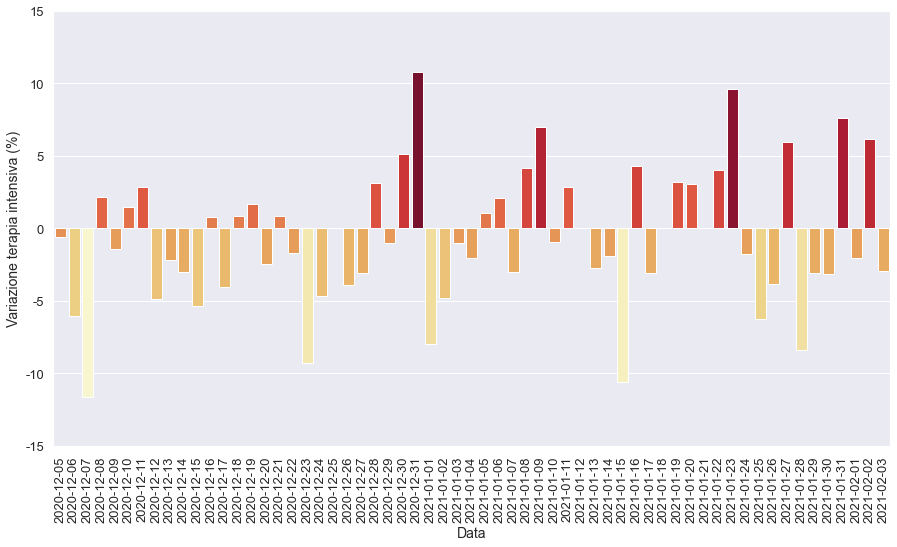

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

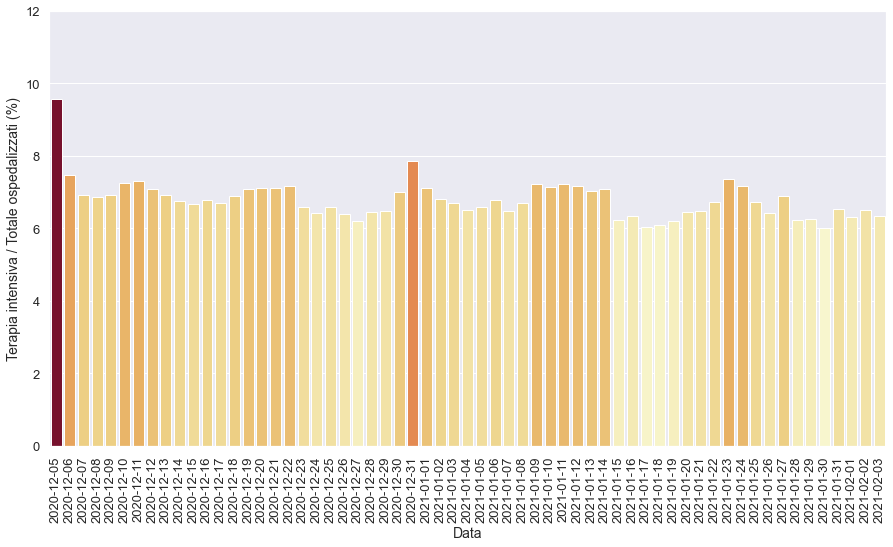

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

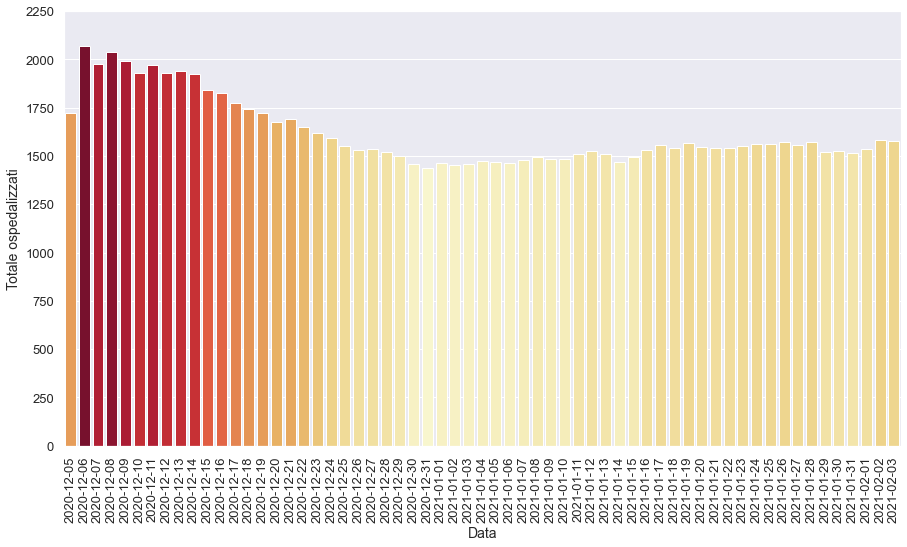

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

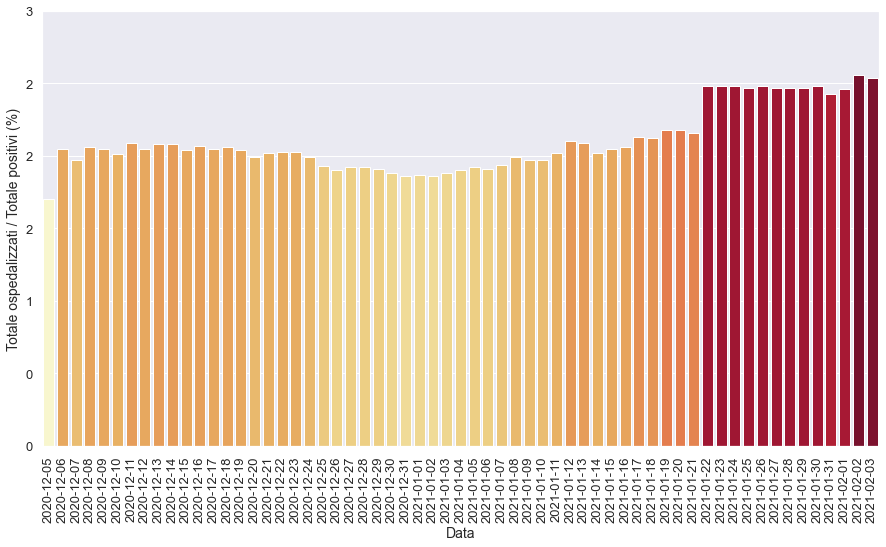

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

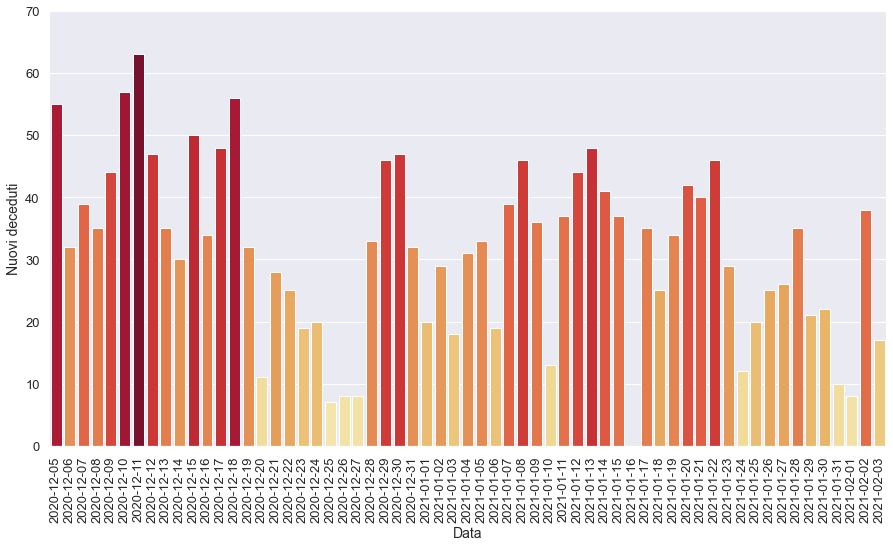

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

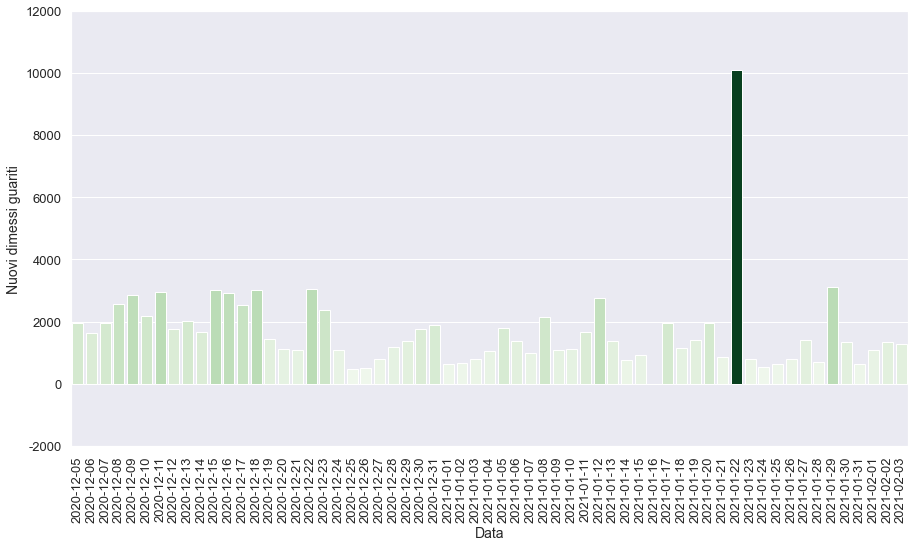

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-04T17:00:00,15,Campania,1377,96,1473,76024,77497,-328,747,...,31.0,6743.0,3964.0,-341.0,6.52,1.90,11.08,18.84,-2.04,-0.42
1,2021-01-05T17:00:00,15,Campania,1372,97,1469,74891,76360,-1137,688,...,33.0,7425.0,4193.0,-1133.0,6.60,1.92,9.27,16.41,1.04,-1.47
2,2021-01-06T17:00:00,15,Campania,1362,99,1461,74882,76343,-17,1366,...,19.0,17212.0,14675.0,-9.0,6.78,1.91,7.94,9.31,2.06,-0.02
3,2021-01-07T17:00:00,15,Campania,1385,96,1481,74878,76359,16,1052,...,39.0,11930.0,6493.0,-4.0,6.48,1.94,8.82,16.20,-3.03,0.02
4,2021-01-08T17:00:00,15,Campania,1395,100,1495,73651,75146,-1213,984,...,46.0,8889.0,4697.0,-1227.0,6.69,1.99,11.07,20.95,4.17,-1.59
5,2021-01-09T17:00:00,15,Campania,1376,107,1483,73793,75276,130,1263,...,36.0,14714.0,6482.0,142.0,7.22,1.97,8.58,19.48,7.00,0.17
6,2021-01-10T17:00:00,15,Campania,1377,106,1483,73905,75388,112,1253,...,13.0,15411.0,10221.0,112.0,7.15,1.97,8.13,12.26,-0.93,0.15
7,2021-01-11T17:00:00,15,Campania,1400,109,1509,73208,74717,-671,1021,...,37.0,9690.0,6352.0,-697.0,7.22,2.02,10.54,16.07,2.83,-0.89
8,2021-01-12T17:00:00,15,Campania,1414,109,1523,71066,72589,-2128,662,...,44.0,8747.0,4416.0,-2142.0,7.16,2.10,7.57,14.99,0.00,-2.85
9,2021-01-13T17:00:00,15,Campania,1405,106,1511,70749,72260,-329,1098,...,48.0,14742.0,9659.0,-317.0,7.02,2.09,7.45,11.37,-2.75,-0.45


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

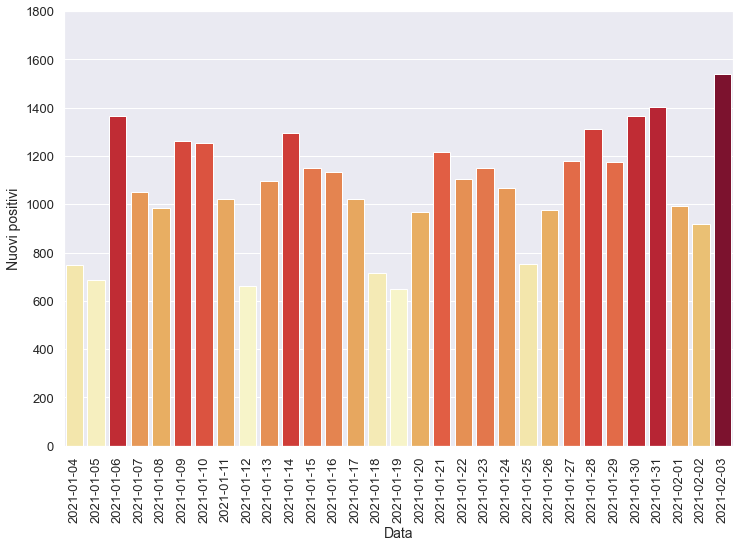

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

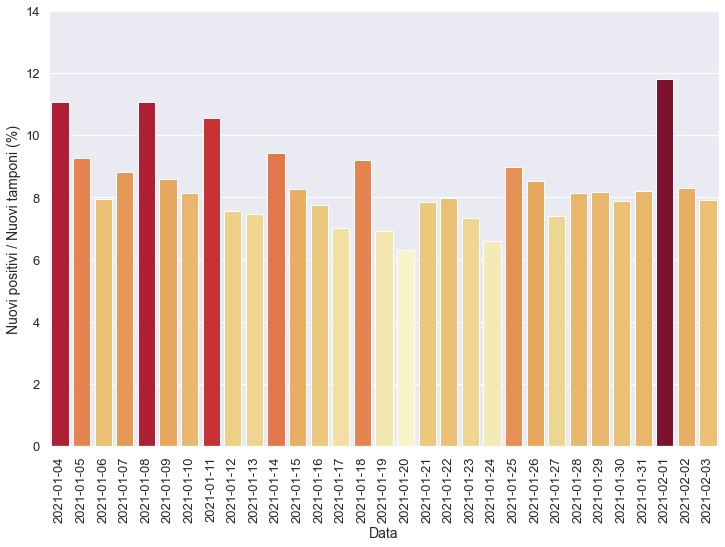

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

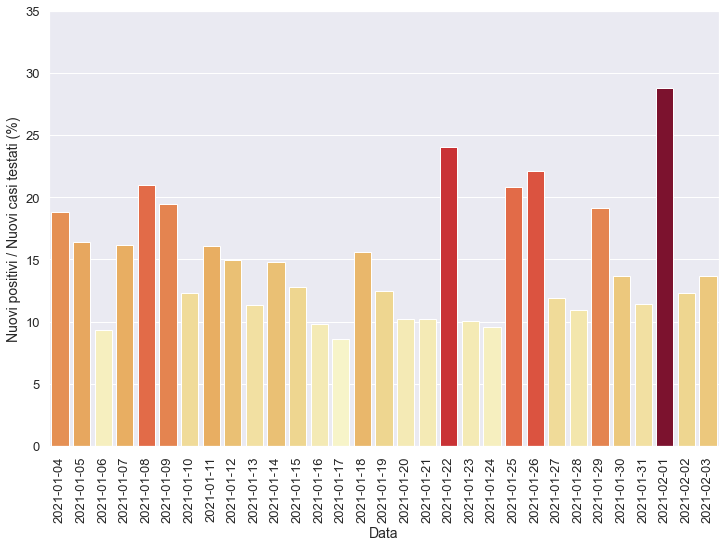

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

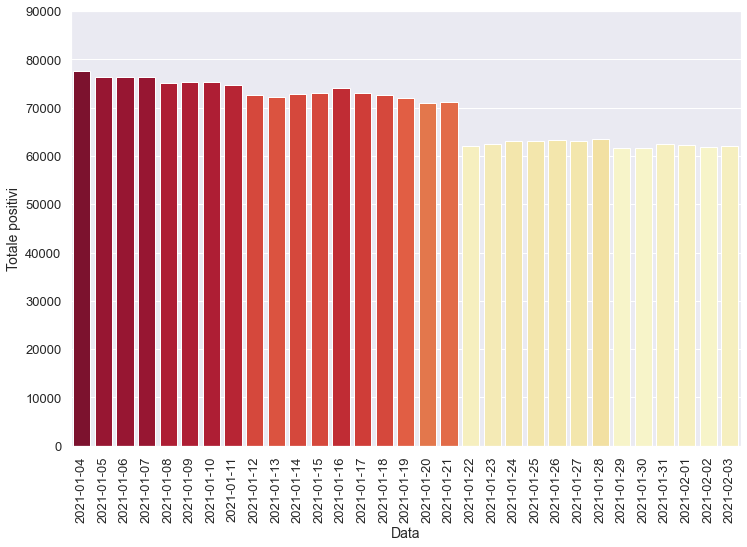

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

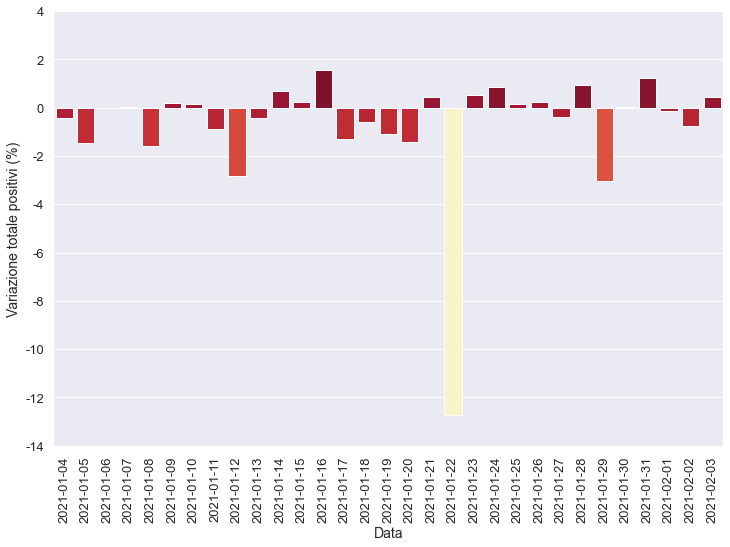

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

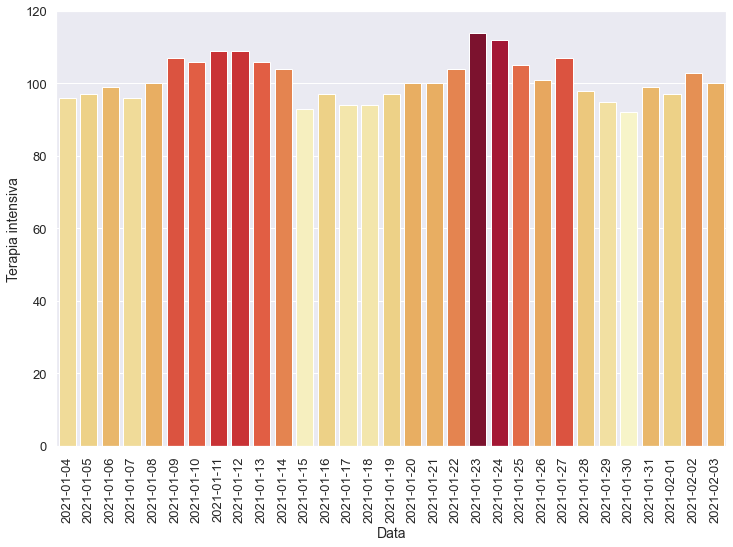

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

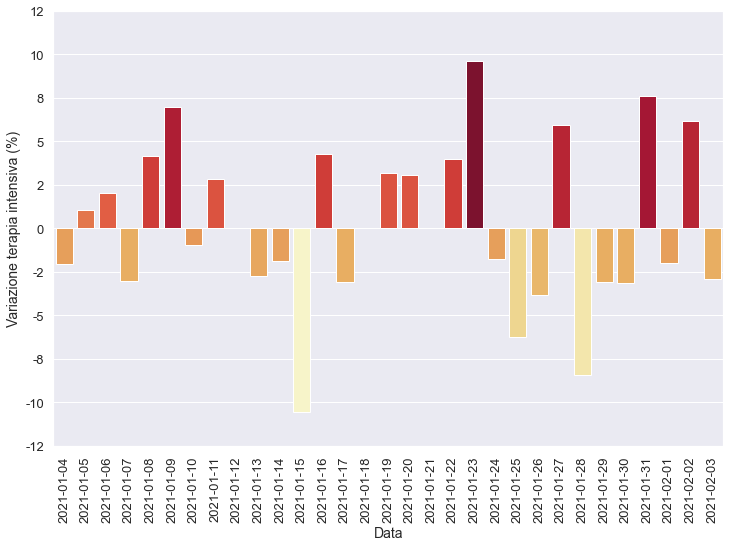

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

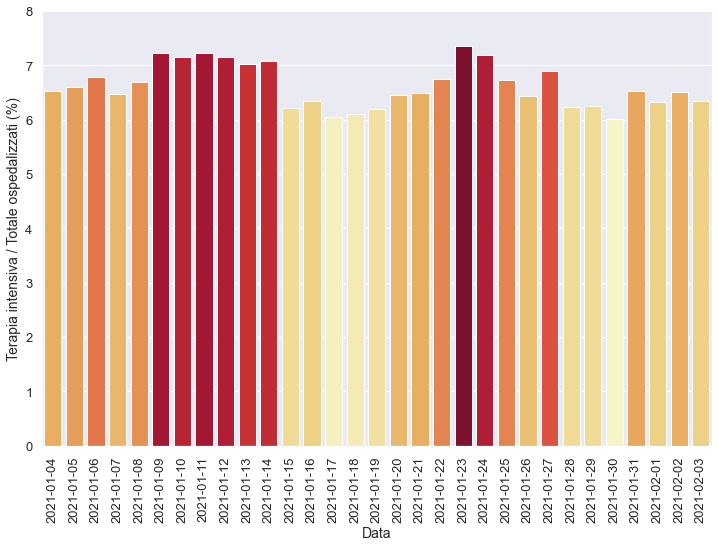

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

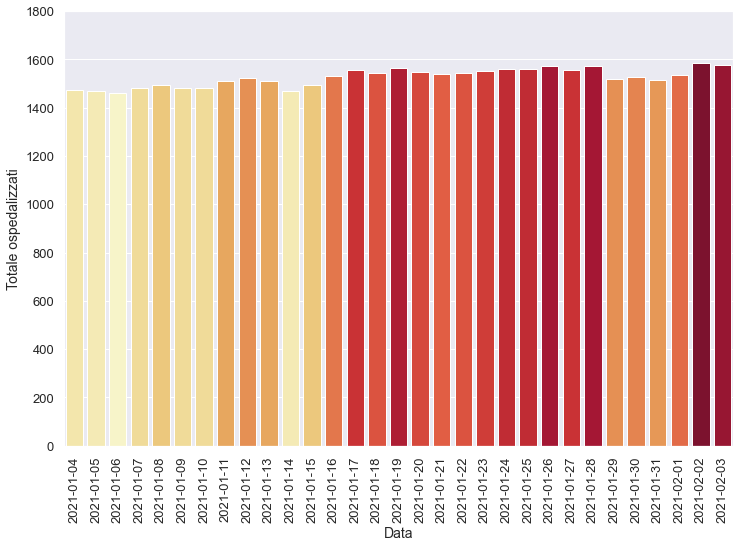

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

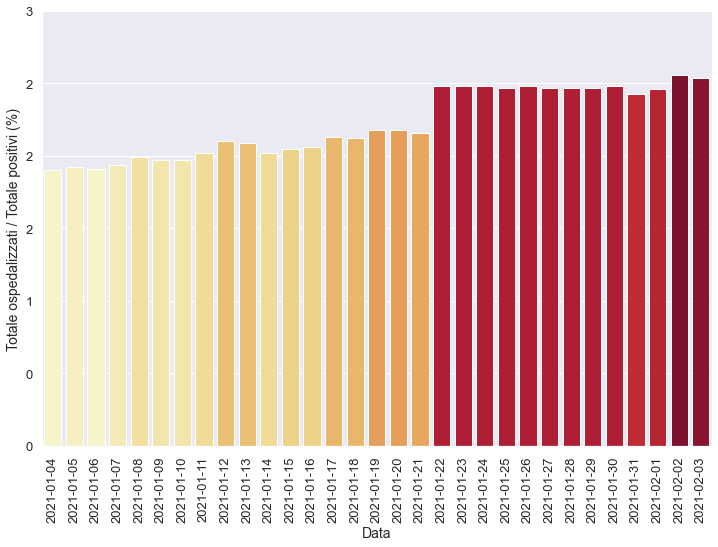

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

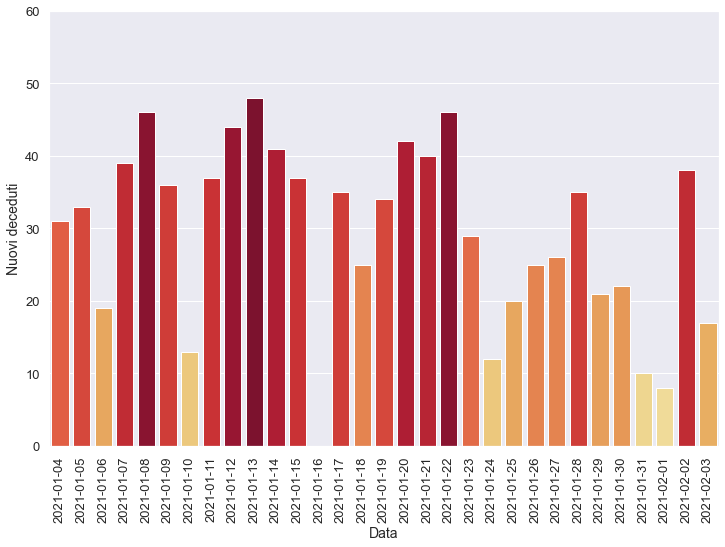

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

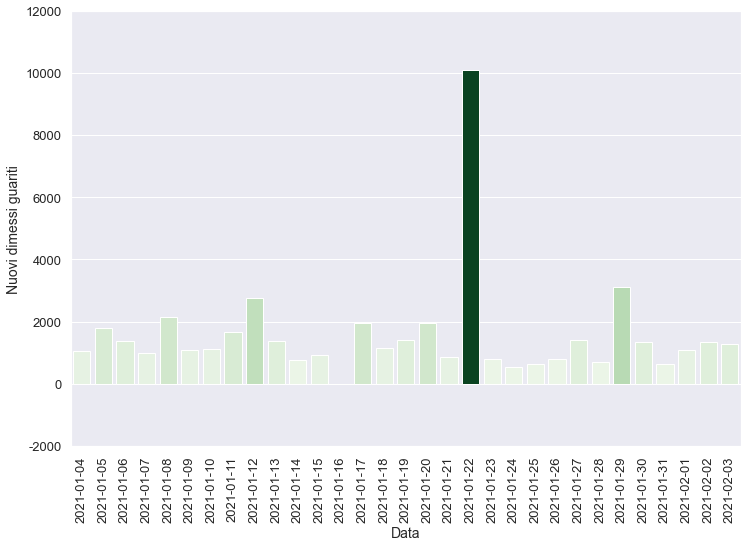

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-27T17:00:00,15,Campania,1447,107,1554,61441,62995,-238,1178,...,26.0,15933.0,9877.0,-221.0,6.89,2.47,7.39,11.93,5.94,-0.38
1,2021-01-28T17:00:00,15,Campania,1474,98,1572,62017,63589,594,1313,...,35.0,16112.0,12002.0,576.0,6.23,2.47,8.15,10.94,-8.41,0.94
2,2021-01-29T17:00:00,15,Campania,1425,95,1520,60122,61642,-1947,1175,...,21.0,14380.0,6128.0,-1895.0,6.25,2.47,8.17,19.17,-3.06,-3.06
3,2021-01-30T17:00:00,15,Campania,1435,92,1527,60129,61656,14,1366,...,22.0,17345.0,9969.0,7.0,6.02,2.48,7.88,13.70,-3.16,0.02
4,2021-01-31T17:00:00,15,Campania,1417,99,1516,60906,62422,766,1401,...,10.0,17094.0,12252.0,777.0,6.53,2.43,8.20,11.43,7.61,1.24
5,2021-02-01T17:00:00,15,Campania,1437,97,1534,60799,62333,-89,994,...,8.0,8417.0,3456.0,-107.0,6.32,2.46,11.81,28.76,-2.02,-0.14
6,2021-02-02T17:00:00,15,Campania,1480,103,1583,60276,61859,-474,919,...,38.0,11073.0,7452.0,-523.0,6.51,2.56,8.30,12.33,6.19,-0.76
7,2021-02-03T17:00:00,15,Campania,1475,100,1575,60542,62117,258,1539,...,17.0,19429.0,11245.0,266.0,6.35,2.54,7.92,13.69,-2.91,0.42


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

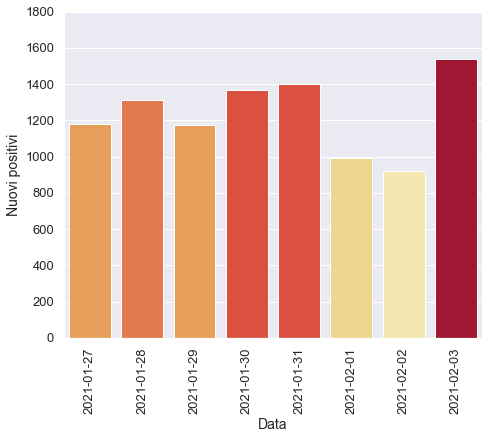

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

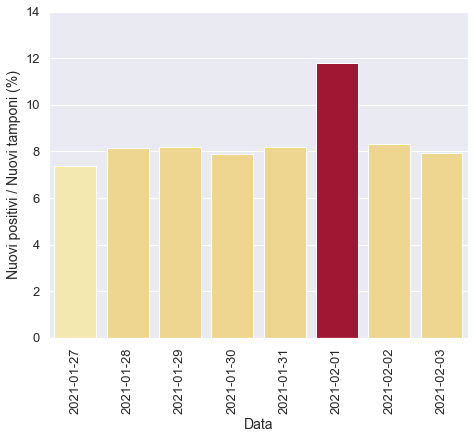

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

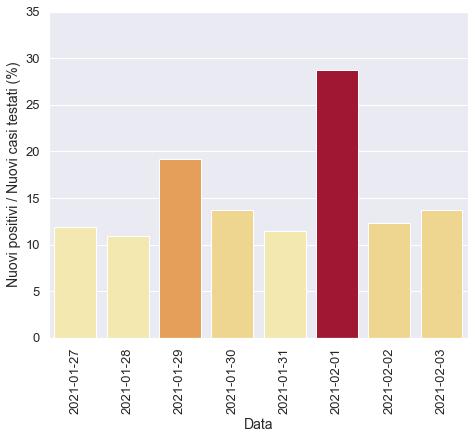

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

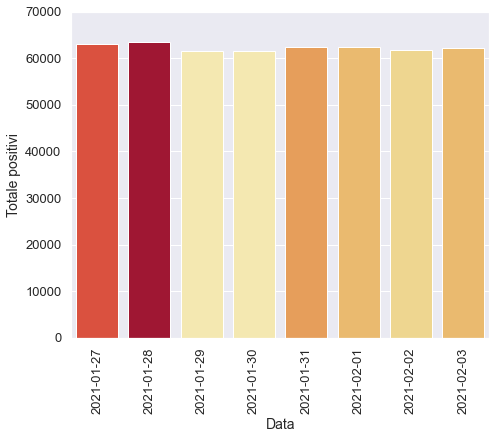

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

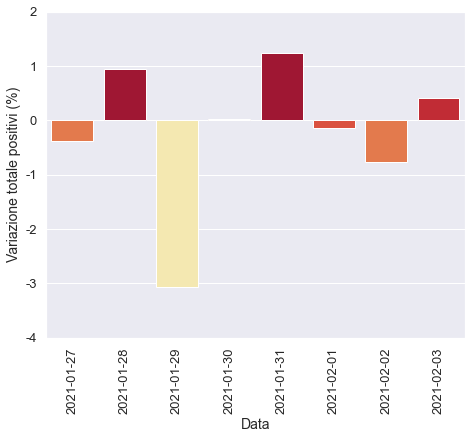

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

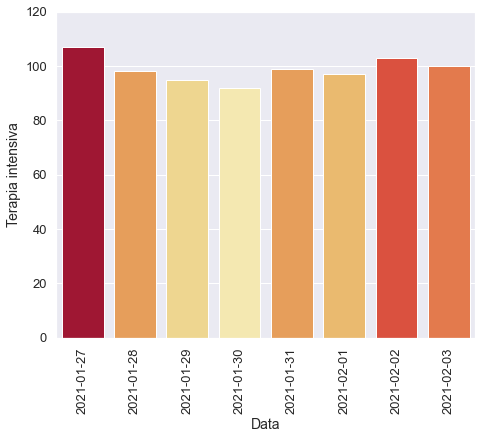

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

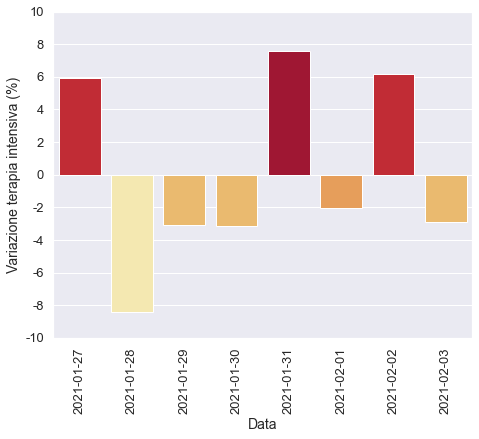

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

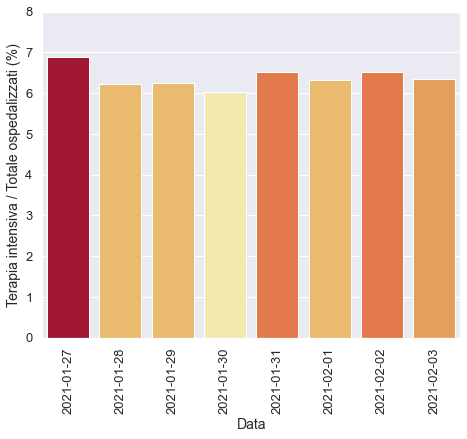

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

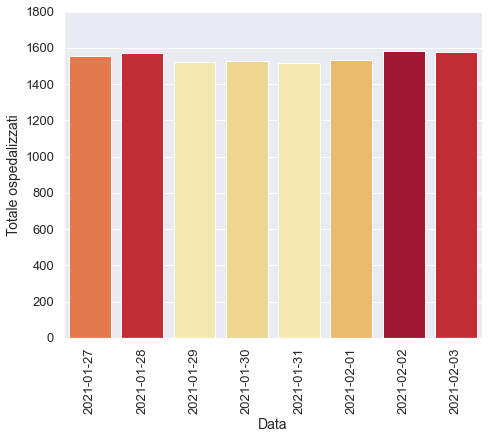

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

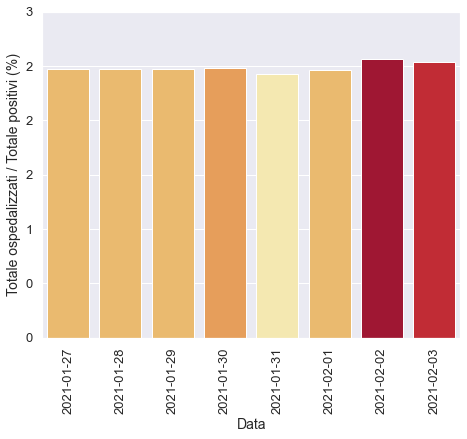

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

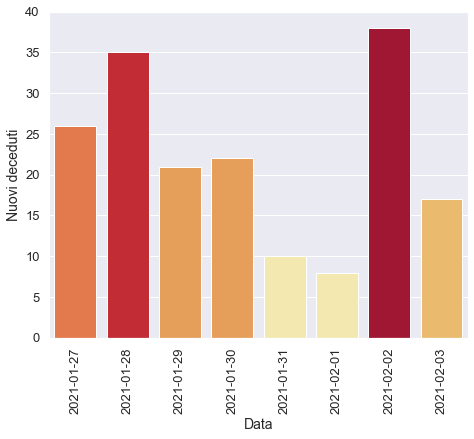

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

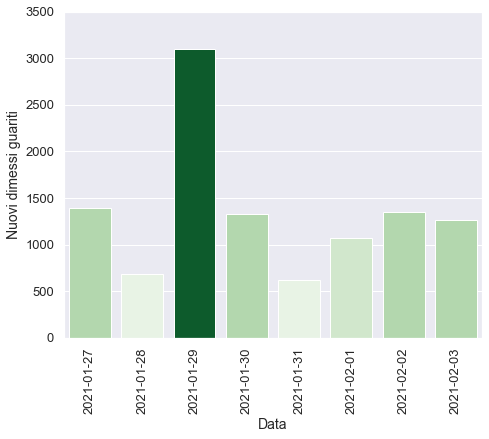

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)